# 6.2 Exploring Relationships

#### 01 Import visualization libraries
#### 02 Load dataset
#### 03 Exploring Relationships
        3.1 Correlation matrix heatmap (colored)
        3.2 Scatterplots
        3.3 Pair Plots
        3.4 Categorical Plots
#### 04 Revisit the Exploratory Questions
#### 05 Define Hypotheses

### 01 Import visualization libraries

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [223]:
# Check version of matplotlib
matplotlib.__version__

'3.9.2'

##### Not listed as 3.1.1. so should not have problems with this version

In [225]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

### 02 Load Dataset

In [227]:
# File path and name
path = r"C:\Users\wallm\01 2025 Advanced Analytics Project"

In [228]:
path

'C:\\Users\\wallm\\01 2025 Advanced Analytics Project'

In [229]:
#Load clean file for Retail_Superstore_cleaned
df_super_clean = pd.read_csv(os.path.join(path,'Retail_Superstore_Project', '02 Data', 'Retail_Superstore_Cleaned.csv'), index_col = False)

In [230]:
df_super_clean.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Outlier,Returned,Duplicate_Flag
0,1,US-2021-103800,03/01/2021,07/01/2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,Normal,No,Unique
1,2,US-2021-112326,04/01/2021,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,Normal,No,Unique
2,3,US-2021-112326,04/01/2021,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,Normal,No,Unique
3,4,US-2021-112326,04/01/2021,08/01/2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,Outlier,No,Unique
4,5,US-2021-141817,05/01/2021,12/01/2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,Normal,No,Unique


### 03 Exploring Relationships

#### Research Questions

##### Descriptive Analysis

- What are the sales trends over time? (e.g., monthly, quarterly, yearly)  
- Which product categories and subcategories contribute the most to total sales and profit?  
- What is the average discount offered across different regions and how does it impact profit margins?  
- Which regions, cities, and states/provinces have the highest and lowest sales performance?  
- How does the distribution of sales and profit vary across customer segments?

##### Correlations
- Does higher discount rates negatively impact profit margins?
- Do customers in the "Corporate" segment generate higher average order values compared to the "Consumer" segment?
- Does profitability vary significantly by region, with certain regions consistently outperforming others?

#### 3.1 Correlation matrix heatmap (colored)

In [235]:
df_super_clean.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit_Outlier', 'Returned', 'Duplicate_Flag'],
      dtype='object')

In [236]:
# Create a 'Profit Margin (%)' column to the dataset
df_super_clean["Profit Margin (%)"] = df_super_clean['Profit'] / df_super_clean['Sales'] *100

In [237]:
# Create a subset
df_super_sub = df_super_clean[['Discount', 'Profit', 'Sales', 'Quantity', 'Profit Margin (%)']]

In [238]:
df_super_sub

,Discount,Profit,Sales,Quantity,Profit Margin (%)
0,0.2,5.5512,16.448,2,33.75
1,0.8,-5.4870,3.540,2,-155.00
2,0.2,4.2717,11.784,3,36.25
3,0.2,-64.7748,272.736,3,-23.75
4,0.2,4.8840,19.536,3,25.00
...,...,...,...,...,...
10189,0.2,19.7910,52.776,3,37.50
10190,0.2,6.4750,20.720,2,31.25
10191,0.2,-0.6048,3.024,3,-20.00
10192,0.0,2.7279,90.930,7,3.00


In [239]:
# Convert categorical variables into numerical where necessary
df_super_sub = pd.get_dummies(df_super_sub, drop_first=True)

##### Using the Matplotlib library

In [241]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_super_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_super_sub.shape[1]), df_super_sub.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_super_sub.shape[1]), df_super_sub.columns, fontsize=10) # y axis labels

([<matplotlib.axis.YTick at 0x1b0a37149b0>,
 [Text(0, 0, 'Discount'),
  Text(0, 1, 'Profit'),
  Text(0, 2, 'Sales'),
  Text(0, 3, 'Quantity'),
  Text(0, 4, 'Profit Margin (%)')])

In [242]:
# Configure layout

cb = plt.colorbar() # add a colour legend
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix - Discount vs Profit', fontsize=13)

Text(0.5, 1.0, 'Correlation Matrix - Discount vs Profit')

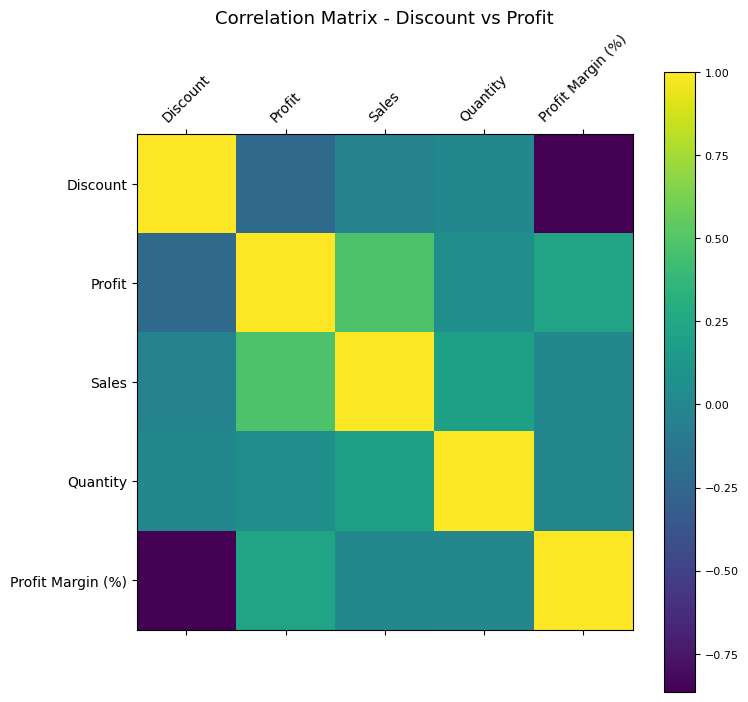

In [243]:
plt.show()

In [283]:
plt.close()  # Closes this plot to avoid overlap

##### Using the Seaborn Library

In [245]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn
corr = sns.heatmap(df_super_sub.corr(), annot=True, ax=ax, cmap="coolwarm")

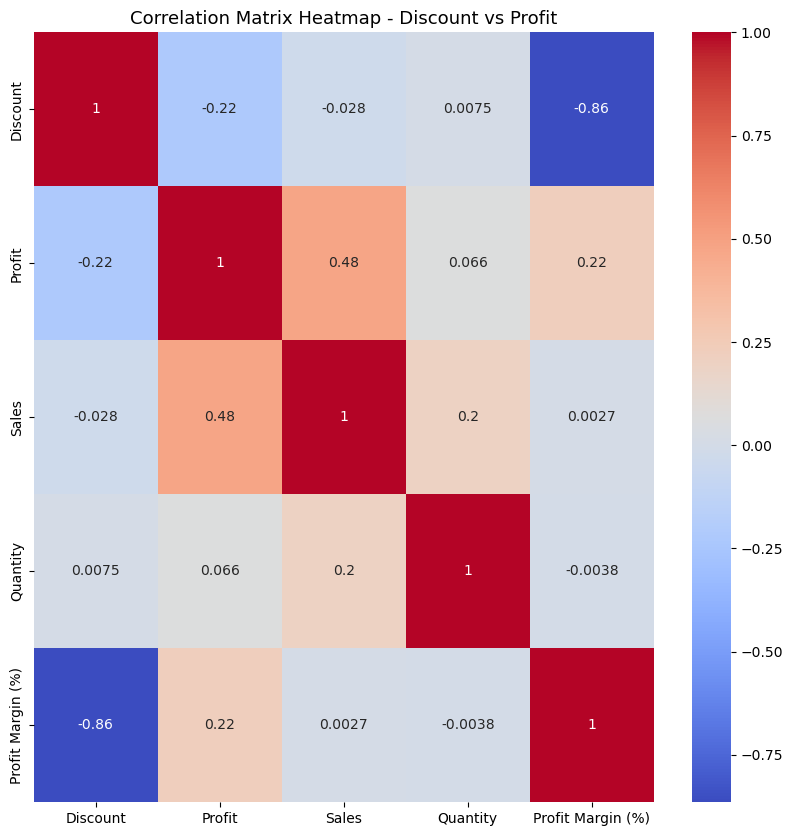

In [246]:
# Adding a title to the heatmap
ax.set_title("Correlation Matrix Heatmap - Discount vs Profit", fontsize=13)

# Display Heatmap
plt.show()

#### Correlation matrix heatmaps show relationships between Discount, Profit, Sales, Quantity, and Profit Margin (%)
##### The Blue colour represents a negative correlation and a red represents a positive correlation - the darker the colour incidates a stronger correlation
- Discount vs. Profit Margin (%) = -0.86
  (Strong Negative Correlation) suggests as discounts increase, profit margins tend to decrease significantly
  
- Discount vs. Profit = -0.22
  (Weak Negative Correlation) indicating that while higher discounts slightly reduce total profit, the impact is less direct compared to profit margins

  
- Sales vs. Profit = 0.48
  (Moderate Positive Correlation) indicates that higher sales are moderately associated with higher profit levels

- Sales vs. Discount = -0.028
  (Very Weak Negative Correlation) is very close to zero, suggesting that discounting has a minimal direct relationship with sales volume

  
- Quantity vs. Sales = 0.20
  (Weak Positive Correlation) indicates that higher quantities sold slightly correlate with increased sales but not strongly

  
- Profit Margin (%) vs. Sales = 0.0027
  (No Correlation) shows correlation near zero suggests no meaningful relationship between sales volume and profit margin percentage

In [248]:
# Export Seaborn Correlation Heatmap

plt.savefig(os.path.join(path, 'Retail_Superstore_Project', '04 Analysis', 'Visualisations', 'Corr_Heatmap_sns.png'))

#### 3.2 Scatterplots

##### Analysize Sales vs. Profit from 0.48 (Moderate Positive Correlation)

In [271]:
# Create a scatterplot for the "Sales" and "Profit" columns in seaborn

sns.lmplot(x = 'Profit', y = 'Sales', data = df_super_sub)

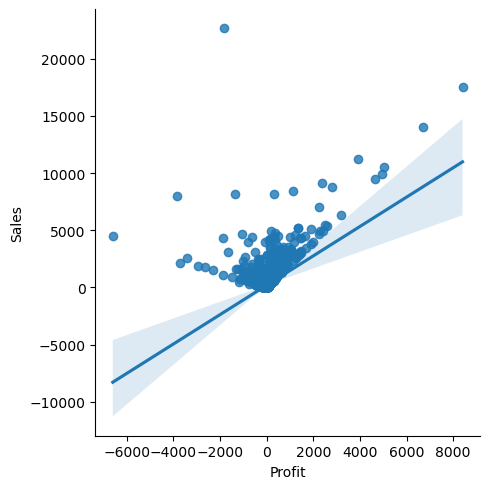

In [273]:
plt.show()

In [275]:
plt.close()  # Closes this plot to avoid overlap

##### The scatterplot illusrtates a positive correlation between Profit and Sales. As sales increase, profit generally tends to increase as well.
- The trendline suggests a direct relationship where higher sales are often associated with higher profits
- There are some noticeable outliers, particularly with extreme values of Sales and negative profits
- Some points show high sales with negative profits, which could indicate discounts or returns, for further analysis.
- The regression line indicates the general trend, with a shaded region representing the confidence interval. The confidence interval widens slightly at higher values, indicating more uncertainty in predictions at those ranges.

##### Analysize Discount vs. Profit Margin (%) from -0.86 (Strong Negative Correlation)

In [277]:
# Create a scatterplot for the "Sales" and "Profit" columns in seaborn

sns.lmplot(x = 'Discount', y = 'Profit Margin (%)', data = df_super_sub)

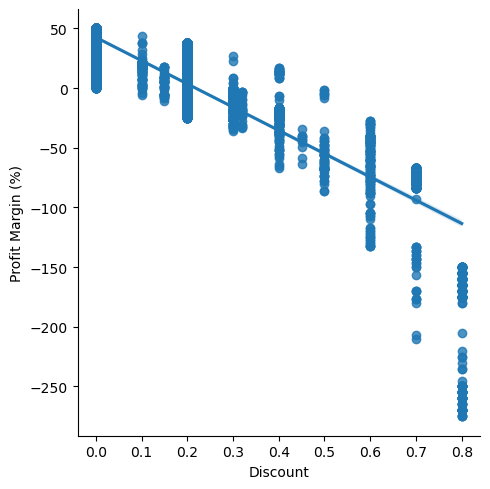

In [279]:
plt.show()

In [285]:
plt.close()  # Closes this plot to avoid overlap

##### The scatterplot demonstrates a strong negative correlation between Discount and Profit Margin (%).
- As the discount increases, the profit margin tends to decrease significantly.
- The trendline highlights a clear downward slope, reinforcing the negative correlation between the two variables.
- Higher discounts are associated with increasingly negative profit margins, indicating profit erosion.
- This pattern suggests that aggressive discounting may reduce profitability significantly.

#### 3.3 Pair Plots

In [307]:
# Create a pair plot using the df_super_sub variables generated for the Heatmap.

sns.pairplot(df_super_sub)

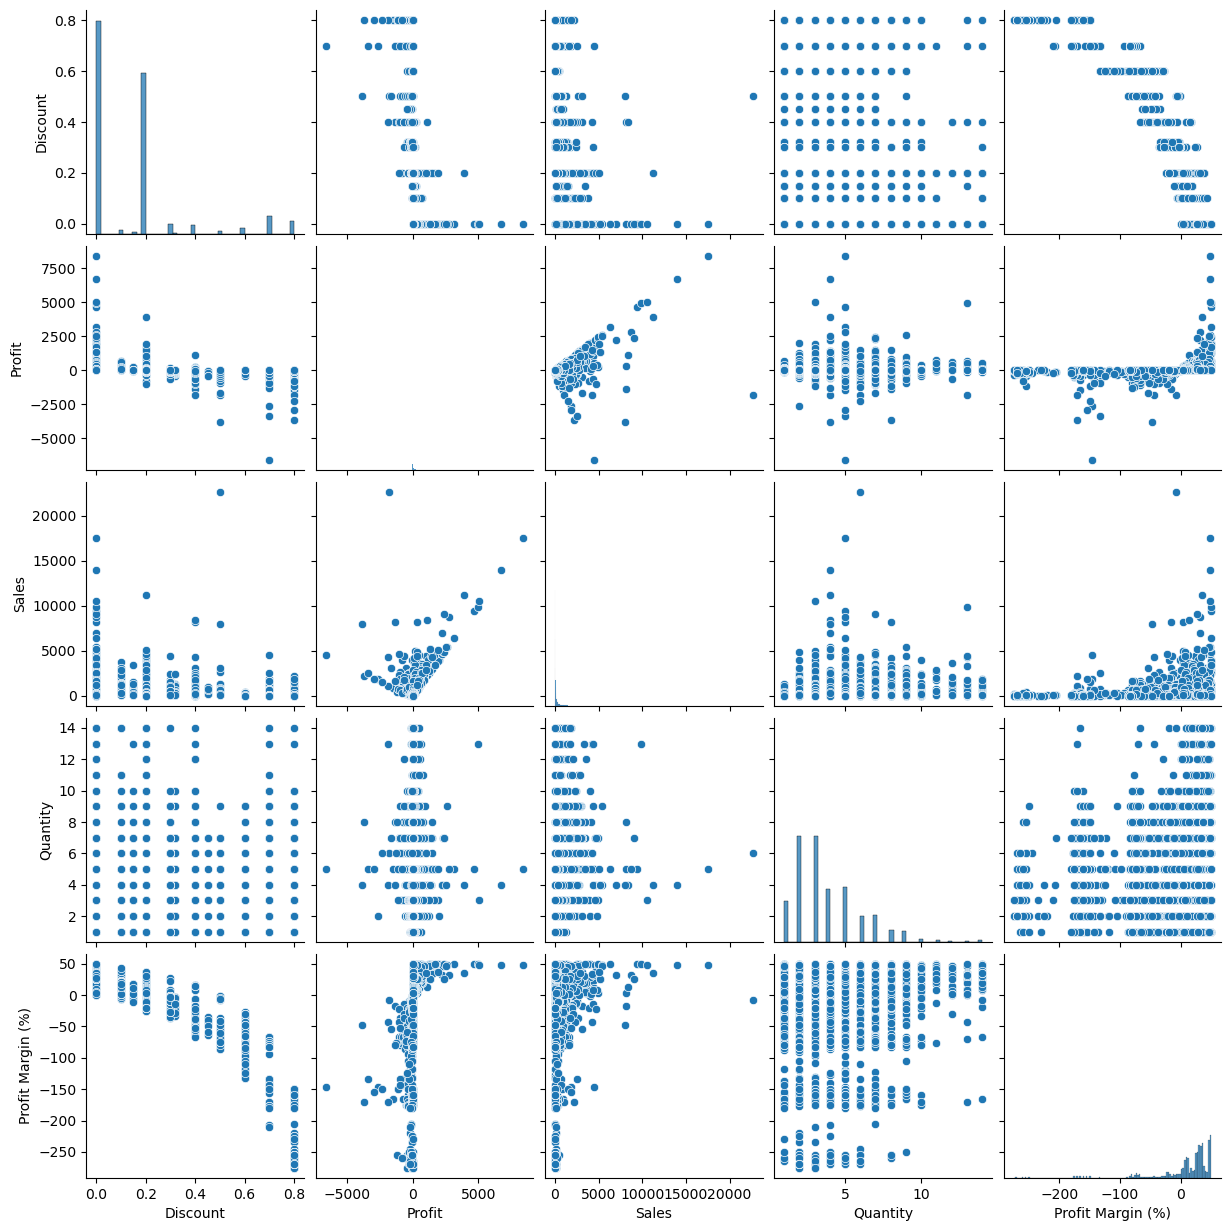

In [309]:
plt.show()

In [311]:
plt.close()  # Closes this plot to avoid overlap

##### Comment on the distribution of the variables:
- Discount:
The distribution is highly skewed with most data points concentrated near 0 and a few peaks at fixed points (e.g., 0.2, 0.5, 0.8).
This indicates a limited range of discounting strategies, possibly fixed discount tiers rather than a continuous distribution of discount values.
- Profit:
The profit variable shows a wide spread with both positive and negative values.
There is a cluster of points around the lower profit values and some extreme outliers on both ends.
The presence of negative profits suggests possible losses on certain transactions, which may be tied to high discounts or returns.
- Sales:
Sales show a right-skewed distribution with most points concentrated at lower sales values but with a few significantly high sales values (outliers).
This could suggest a large number of smaller transactions and a few major sales events driving a significant portion of revenue.
- Quantity:
The quantity variable appears right-skewed with many transactions involving smaller quantities and fewer involving larger orders.
This suggests that lower quantities are more common, possibly reflecting retail consumer behavior rather than wholesale.
- Profit Margin (%):
The distribution of profit margin (%) seems highly spread with numerous negative values and some extreme outliers.
A negative profit margin could be due to excessive discounting or operational losses in some transactions.

##### Additional Pairs Worth Exploring taken from the Pair Plots:
- Quantity vs. Sales:
This can help identify if larger order quantities drive higher sales or if smaller quantities with premium pricing affect sales differently.
- Profit vs. Discount:
As per the Profit Margin (%) vs. Discount, this scatterplot indicates a negative correlation, where higher discounts tend to reduce profit.
Exploring this relationship further is crucial because excessive discounts can erode profit margins significantly, even if sales volume increases.
Understanding this relationship can help identify the optimal discounting strategy to maximize profitability.

In [315]:
# Analysize further 'Sale' vs. 'Quantity'

# Create a scatterplot for the "Sales" and "Profit" columns in seaborn

sns.lmplot(x = 'Quantity', y = 'Sales', data = df_super_sub)

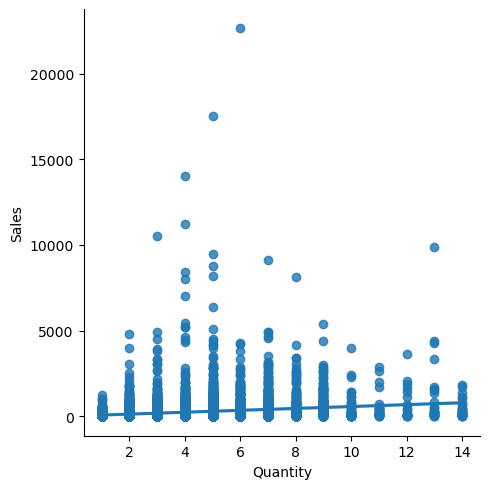

In [317]:
plt.show()

In [321]:
plt.close()  # Closes this plot to avoid overlap

##### The scatterplot demonstrates a slight positive correlation between Quantity and Sales, as per the 0.2 positive correction given in the heatmap. Further detail taken:
- As quantity increases, sales tend to increase, but the relationship is not very strong or consistent.
- Most data points are concentrated around lower quantities (between 2 and 8 units).
- This suggests that smaller order sizes are more common in the dataset, which could be typical in retail transactions where individual or small batch purchases dominate.
- Higher quantities (above 10 units) occur less frequently and don't show a proportional increase in sales.
- This could imply bulk discounts or lower-priced items contributing less to total sales despite higher volumes.
- Further analysis considering product categories or pricing strategies could provide deeper insights.

In [325]:
# Analysize further 'Profit' vs. 'Discount'

# Create a scatterplot for the "Profit" and "Discount" columns in seaborn

sns.lmplot(x = 'Discount', y = 'Profit', data = df_super_sub)

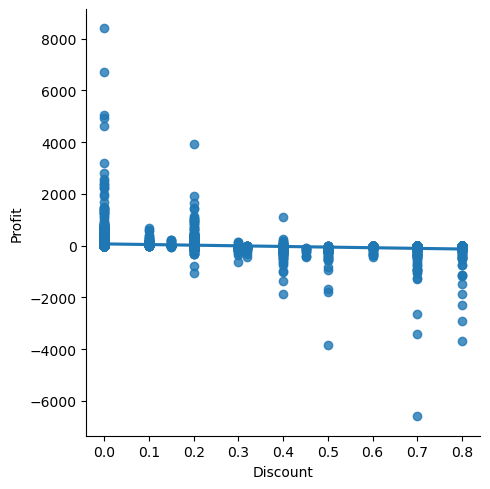

In [327]:
plt.show()

In [331]:
plt.close()  # Closes this plot to avoid overlap

##### The scatterplot demonstrates a clear negative correlation between Discount and Profit, but there only a negative -0.22 correlation given in the heatmap!?. Further detail given in this scatterplot:
- As discounts increase, profit tends to decrease significantly, with some instances showing negative profits at higher discount levels.
- Higher discounts (above 0.5) show a noticeable cluster of negative profits.
- This suggests that aggressive discounting strategies might be eroding profitability, potentially leading to losses despite increased sales volume.
- At lower discount levels (0 to 0.2), profit values are generally positive and show less variation.
- This could indicate that minimal discounts maintain profitability while still driving revenue.
- A few outliers with extremely high positive profits are observed, particularly at lower discount levels and might be linked to high-margin products or successful pricing strategies where discounts were minimal but still resulted in strong sales performance.
- Further exploration into product categories and pricing strategies could help determine whether this trend applies universally or is product-specific.

##### While the heatmap plotted earlier provided a broad summary of correlation across the entire dataset, this scatterplot reveals localized patterns and outliers more clearly. The weaker correlation in the heatmap may be due to outliers, non-linearity, or other moderating factors.

#### 3.4 Categorical Plots

##### Creating a categorical plot using Category and Sub-Category variable's, Sales by Category and Sub-Category

C:\Users\wallm\AppData\Local\Temp\ipykernel_5864\869436177.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_super_clean, x='Category', y='Sales', hue='Sub-Category', ci=None) # 'ci=None' removes the confidence intervals, as 10,000 rows


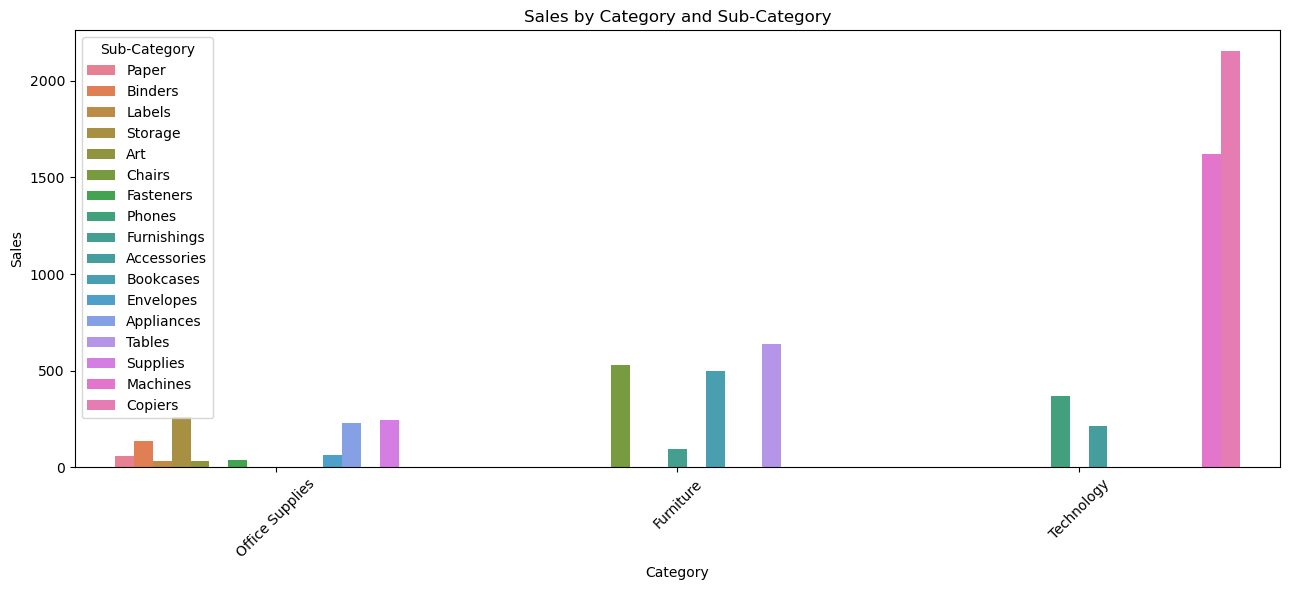

In [345]:
# Setting the size and style of the plot

plt.figure(figsize=(13, 6))

# Creating a bar plot to compare Sales by Category and Sub-Category

sns.barplot(data=df_super_clean, x='Category', y='Sales', hue='Sub-Category', ci=None) # 'ci=None' removes the confidence intervals, as 10,000 rows
plt.title('Sales by Category and Sub-Category')  # Adding a title to the plot
plt.ylabel('Sales')  # Labeling the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to avoid label overlap
plt.show()

In [349]:
plt.close()  # Closes this plot to avoid overlap

##### This bar chart shows total sales across three product categories: Office Supplies, Furniture, and Technology.
- The Technology category, specifically the Machines and Copiers sub-categories, contributes the highest sales figures.
- Office Supplies and Furniture show relatively lower sales figures compared to Technology but still significant for some sub-categories like Chairs and Bookcases.

#### Creating a categorical plot using Category and Sub-Category variable's, Profit by Category and Sub-Category

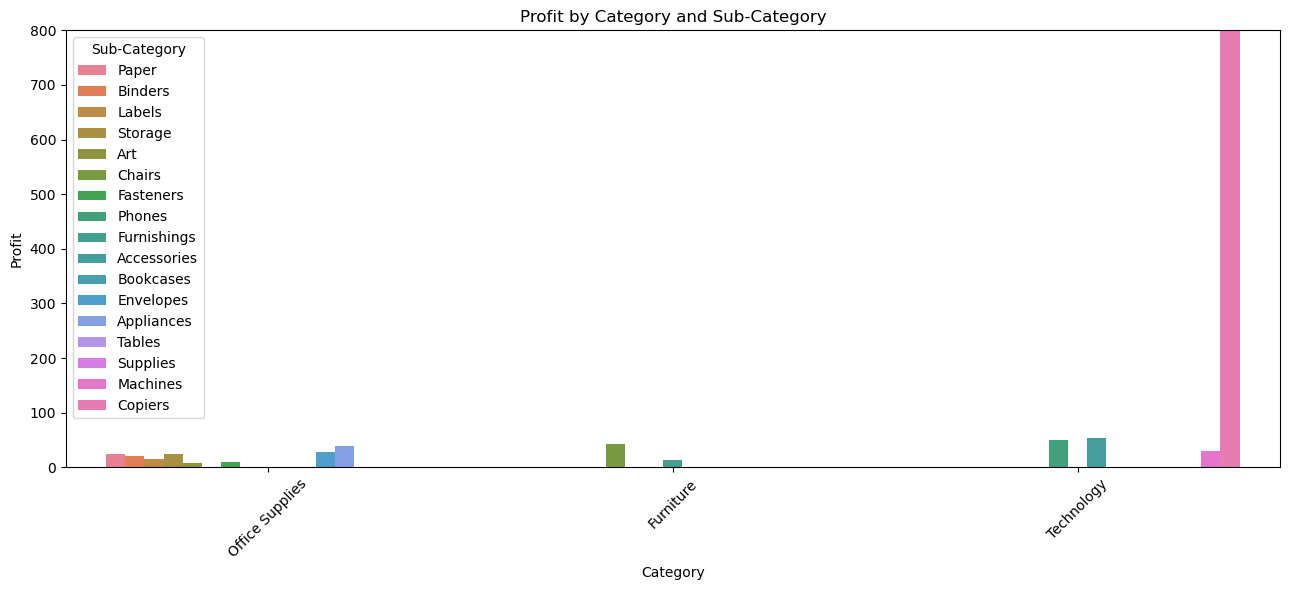

In [353]:
# Setting the size and style of the plot

plt.figure(figsize=(13, 6))

# Creating a bar plot to compare Profit by Category and Sub-Category

sns.barplot(data=df_super_clean, x='Category', y='Profit', hue='Sub-Category', errorbar=None) # 'errorbar=None' removes the confidence intervals, as 10,000 rows
plt.title('Profit by Category and Sub-Category')  # Adding a title to the plot
plt.ylabel('Profit')  # Labeling the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Setting the y-axis limit to a more readable scale (adjust the value based on your dataset)
plt.ylim(0, 800)  # Adjust the upper limit based on your profit range

plt.tight_layout()  # Adjusting layout to avoid label overlap
plt.show()

In [355]:
plt.close()  # Closes this plot to avoid overlap

##### This chart represents total profit across the same categories and sub-categories.
- Technology (specifically Machines and Copiers) also contributes the highest profit, aligning with its strong sales performance.
- Some sub-categories like Binders and Tables show low or negative profit despite having moderate sales, indicating possible discounting issues or high costs.

##### The two charts together highlight the relationship between Sales and Profit across categories and sub-categories:
- Suggests that High Sales do not always equal High Profit: While Technology drives both high sales and profit, other categories (like Office Supplies) show lower profitability despite steady sales figures.
- Profit Margins Vary: Some sub-categories with strong sales (Binders) do not reflect high profits, suggesting potential low margins or high discounting strategies.
- The charts together emphasize the importance of not just focusing on sales volume but also monitoring profitability across sub-categories to ensure sustainable business performance.

#### Create a view the spread of and variability of profit margins across subcategories:

C:\Users\wallm\AppData\Local\Temp\ipykernel_5864\813759151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_super_clean, x='Sub-Category', y='Profit Margin (%)', palette='viridis')


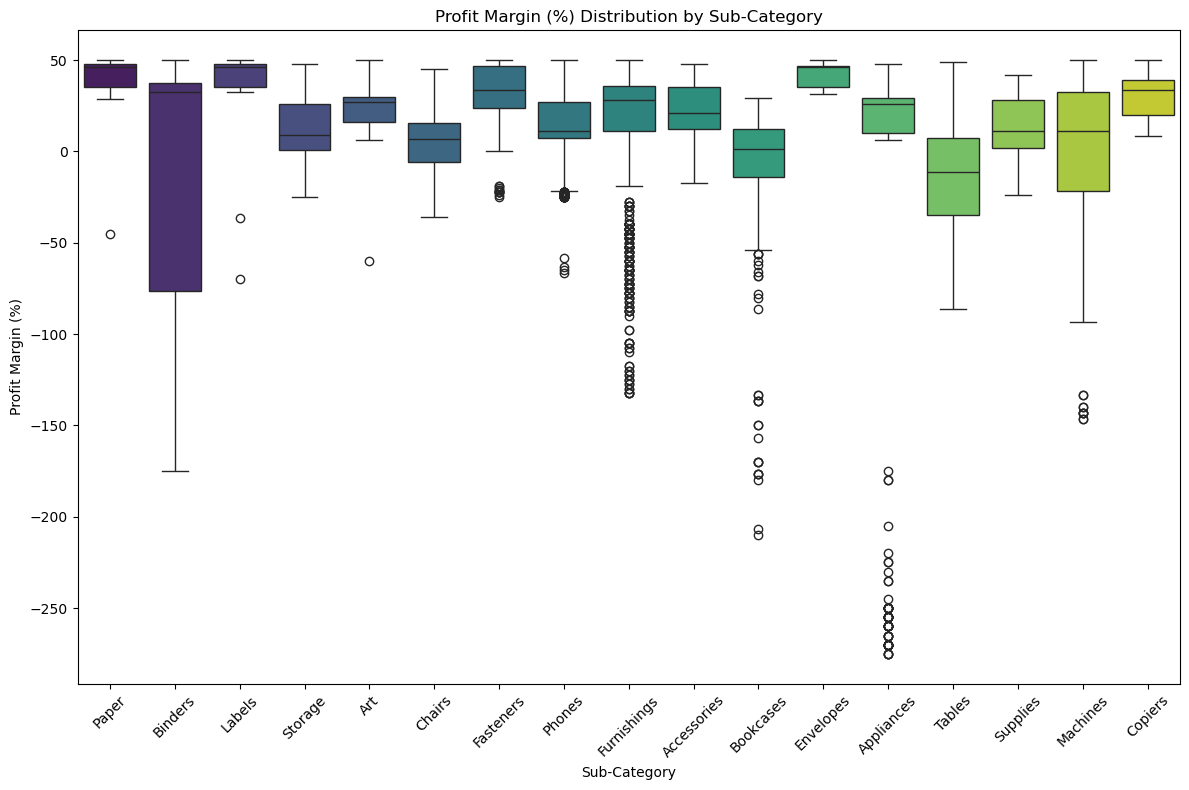

In [364]:
# Create a Boxplot to show distribution of Profit Margin (%)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_super_clean, x='Sub-Category', y='Profit Margin (%)', palette='viridis')
plt.title('Profit Margin (%) Distribution by Sub-Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [366]:
plt.close()  # Closes this plot to avoid overlap

##### This Boxplot illustrates significant variability is observed across different sub-categories.
- Some sub-categories have highly volatile profit margins with large interquartile ranges (IQR) and numerous outliers.
- Copiers, Machines, and Supplies show consistently high profit margins with minimal variability.
- Binders, Tables, and Bookcases exhibit frequent negative profit margins with large clusters of outliers below zero.
- Sub-categories like Phones, Accessories, and Appliances have a large number of outliers with negative profit margins.

##### Creating a categorical plot using Sales, Year, Month, Quarter, Order Date

In [401]:
# Convert the 'Order Date' column to datetime

df_super_clean['Order Date'] = pd.to_datetime(df_super_clean['Order Date'], dayfirst=True)

In [403]:
# Extract Year, Quarter, and Month from the Order Date

df_super_clean['Year'] = df_super_clean['Order Date'].dt.year
df_super_clean['Quarter'] = df_super_clean['Order Date'].dt.to_period('Q')
df_super_clean['Month'] = df_super_clean['Order Date'].dt.to_period('M')

In [405]:
# Aggregate sales data for each time period

monthly_sales = df_super_clean.groupby('Month')['Sales'].sum().reset_index()
quarterly_sales = df_super_clean.groupby('Quarter')['Sales'].sum().reset_index()
yearly_sales = df_super_clean.groupby('Year')['Sales'].sum().reset_index()

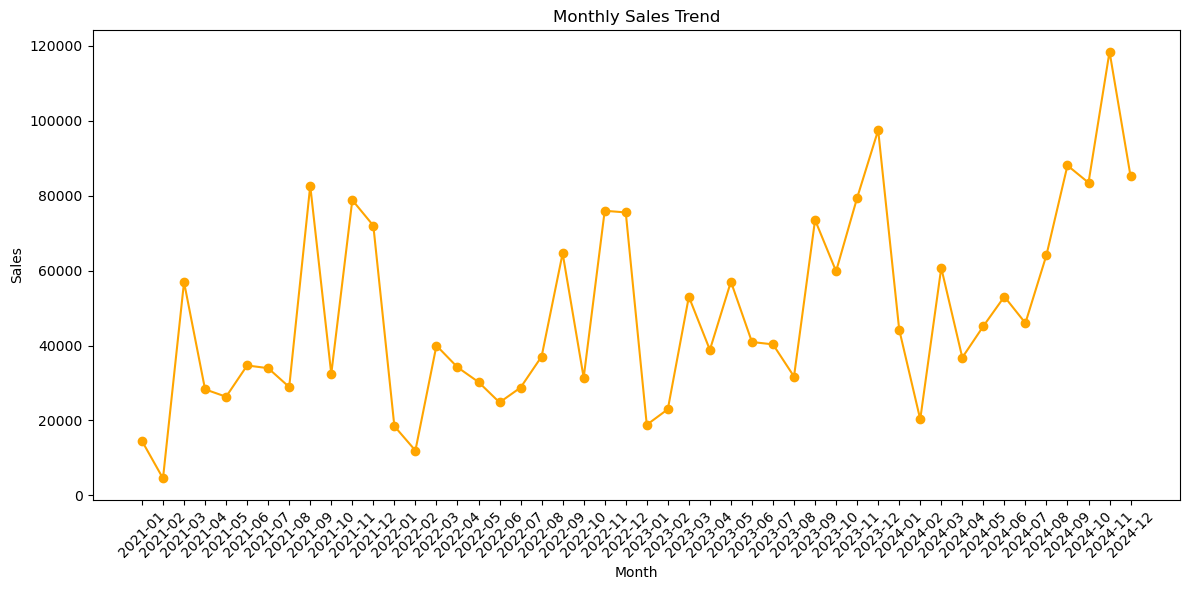

In [407]:
# Create Monthly Sales Trend Chart

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [409]:
plt.close()  # Closes this plot to avoid overlap

##### This line chart shown is illustrating the Monthly Sales Trend over a time period ranging from January 2021 to December 2024.
- The trend fluctuates significantly, indicating seasonal variations or periodic peaks and troughs in sales performance.
- There is an upward trend visible towards the later months in 2024, indicating growth in sales over time.
- Periods of sharp sales drops might be worth further analysis to determine potential causes.

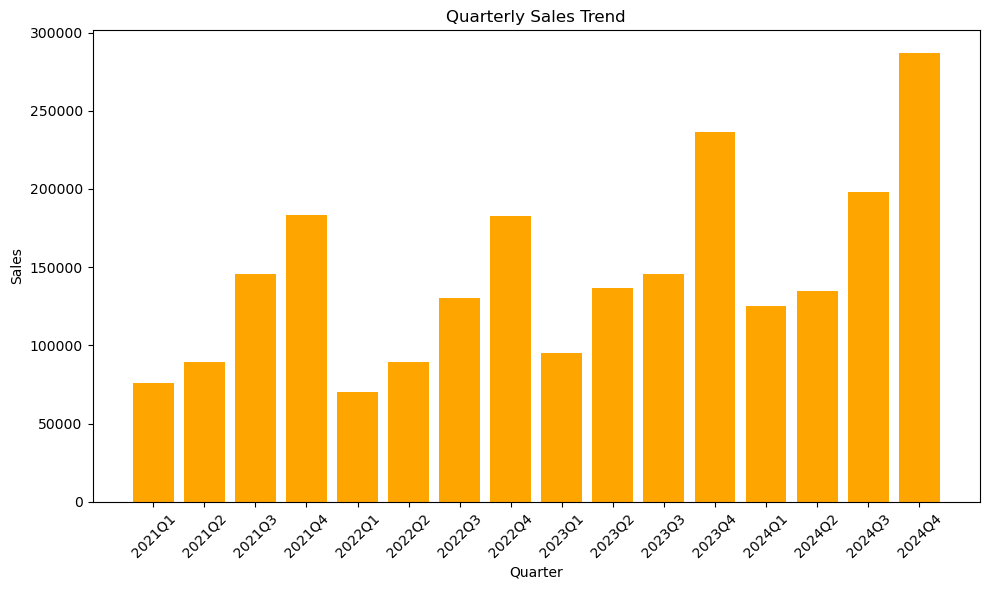

In [412]:
# Create Quarterly Sales Trend Chart

plt.figure(figsize=(10, 6))
plt.bar(quarterly_sales['Quarter'].astype(str), quarterly_sales['Sales'], color='orange')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [414]:
plt.close()  # Closes this plot to avoid overlap

##### The bar chart displayed illustrates the Quarterly Sales Trend over a timeline from the first quarter of 2021 (2021-Q1) to the fourth quarter of 2024 (2024-Q4).
- Sales show a general upward trend over the years, with 2024-Q4 having the highest sales recorded in the dataset.
- There are periodic fluctuations between quarters, suggesting some degree of seasonality or varying sales performance within the year.
- Notable peaks are observed in Q4 for multiple years, suggesting potential year-end sales increases, hence further analysis needed to understand why.

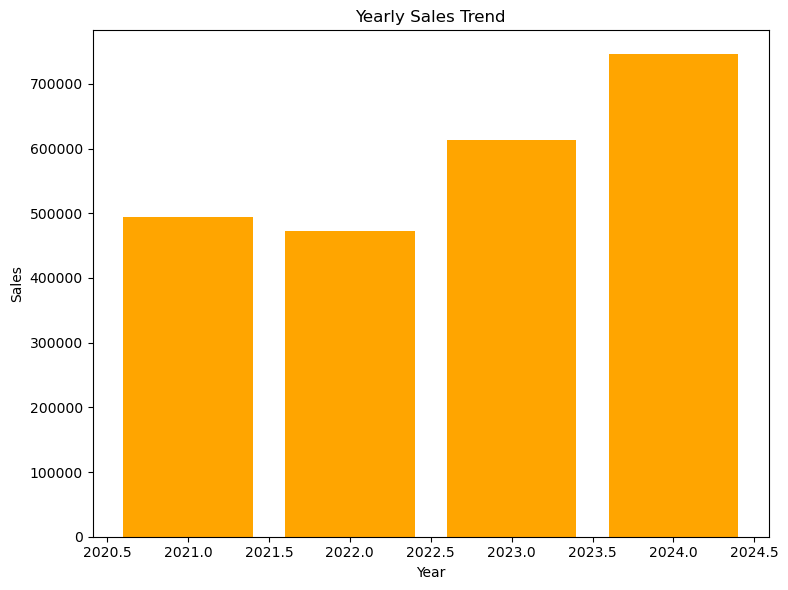

In [417]:
# Create Yearly Sales Trend Chart

plt.figure(figsize=(8, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Sales'], color='orange')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

In [419]:
plt.close()  # Closes this plot to avoid overlap

##### This bar chart displayed here illustrates the Yearly Sales Trend over the years from 2021 to 2024.
- Consistent Growth: The sales trend shows a steady increase from 2021 to 2024.
- Significant Rise in 2024: The highest sales figures are observed in 2024, indicating a peak in performance.
- Dip in 2022: Sales in 2022 appear slightly lower than in 2021 but recover in the following years, indicating a possible temporary downturn.
- Profitability analysis alongside sales trends would offer a more complete picture of business performance.

##### Categorical Insights from using Sales, Year, Month, Quarter, Order Date.
- Trend Consistency: All three charts indicate a general upward trend over the period, with 2024 showing the highest performance.
- Seasonality: Monthly and quarterly charts suggest seasonal fluctuations, with Q4 peaks aligning with increased sales activity, possibly due to holiday seasons or promotions.
- Growth Pattern: Despite short-term dips in certain months and quarters, the yearly chart indicates an overall positive sales trajectory.

### 04 Revisit the Exploratory Questions

##### Which product categories and subcategories contribute the most to total sales and profit?
- High Sales + High Profit Margin: Copiers, Machines, and Supplies are both high revenue and profitable, making them top performers.
- Moderate Sales + Negative Margins: Binders and Tables have significant sales but struggle with profitability, likely due to deep discounting.
- Further analysis needed into discounting, returns, and pricing.

##### Does higher discount rates negatively impact profit margins?

The scatterplot demonstrated a strong negative correlation between Discount and Profit Margin (%):
- As the discount increases, the profit margin tends to decrease significantly.
- The trendline highlighted a clear downward slope, reinforcing the negative correlation between the two variables.
- Higher discounts are associated with increasingly negative profit margins, indicating profit erosion.
- This pattern suggests that aggressive discounting may reduce profitability significantly.
- This pattern could indicate the need for a pricing strategy review to balance sales volume with profitability.

##### What are the sales trends over time? (e.g., monthly, quarterly, yearly)?
- Month line plot: shows fluctuations in sales across the months.
Sales exhibit a 'seasonal pattern' with multiple peaks, suggesting periodic spikes in demand.
- Quarterly bar chart: indicates a general upward trend in sales across the quarters.
A noticeable increase in sales occurred in later quarters, indicating consistent growth.
- Year: Sales grew consistently from 2021 to 2024, with 2024 reaching the highest figures, indicating a strong overall growth pattern.
- Further investigation into sales affect on profit over time needed (e.g. month, quarter, year).

##### NEW QUESTIONS arisen from based on the early findings above?

- Sales Performance and Profitability:
What is the relationship between product return rates and profit margins?
Do returned products consistently lead to negative profit margins across categories?
Which products have the highest return rates, and how do they impact overall profitability?

- Discounting Strategies:
How do discount rates differ across product categories and regions?
Are there optimal discount thresholds that balance sales volume and profitability?

- Customer Segmentation:
Do certain customer segments (e.g., Corporate, Consumer) show consistently higher profitability despite discounting trends?
Are product returns concentrated within specific customer segments or regions?

- Time Series Analysis:
What is the impact of seasonality on both sales and profit margins across multiple years?
Do specific months or quarters show higher discounting patterns that correlate with reduced profit margins?

- Regional Insights:
Are there consistent geographic patterns in high-profit regions despite discounting?
Which regions experience higher return rates, and how does it affect profitability?

- Advanced Analytical Techniques:
Can regression analysis help quantify the precise impact of discounting on profit margins?
Would clustering products based on sales volume, profit margin, and return rates reveal distinct product performance groups?

## MAKE SURE YOU GO BACK AND EXPORT ALL THE CHARTS TO FILE!!!

### 05 Define Hypotheses

- Sales Performance and Profitability:
Product categories with the highest sales volumes also have the highest profit margins.
Null Hypothesis (H0): There is no significant relationship between sales volume and profit margins across product categories.

- Discounting Strategies:
There is a threshold discount rate beyond which profit margins become negative.
Null Hypothesis (H0): Profit margins do not decline significantly after a certain discount threshold.

- Customer Segmentation:
Corporate customers generate higher average sales per transaction compared to Consumer customers.
Null Hypothesis (H0): There is no significant difference in average sales per transaction between customer segments.

- Time Series Analysis:
Profit margins decline more significantly during high sales periods due to increased discounting.
Null Hypothesis (H0): Profit margins remain stable during high sales periods.

- Regional Insights:
Certain regions consistently outperform others in both sales and profitability.
Null Hypothesis (H0): Sales and profitability do not vary significantly across regions.

- Advanced Analytical Techniques:
Clustering products based on sales, profit, and return rates will reveal distinct performance groups (e.g., High Performers, Struggling Products).
Null Hypothesis (H0): No significant clusters exist among products based on sales, profit, and return rates.